In [1]:
import pandas as pd 
import numpy as np
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import seaborn as sns 


In [5]:
data = pd.read_csv('aa.csv',sep=';')

In [4]:
data

,day;Local O 50p;Local O 99\t5p;Local O 99\t8p;Remote O 50p;Remote O 99\t5p;Remote O 99\t8p;Remote Rprt O 50p;Remote Rprt O 99\t5p;Remote Rprt O 99
0,2021-07-01;16.0;229.0; 240.0;14.0; 227.0;234...
1,2021-07-02;14.0;222.0;388.892;12.0;165.0; 227...
2,2021-07-03;14.0;97.0;215.384;12.0;60.0;87.0;14...
3,2021-07-04;14.0;90.0;205.822;12.0;62.0;120.0;1...
4,2021-07-05;14.0;86.0;316.784;13.0;62.0;90.0;14...
5,2021-07-06;14.0;92.215;648.286;13.0;61.0;111.0...
6,2021-07-07;13.0;77.0;183.124;12.0;58.0;109.0;1...
7,2021-07-08;14.0;71.0;173.526;12.0;58.0;84.0;13...
8,2021-07-09;14.0;176.0;227.0;14.0;224.0;232.0;1...
9,2021-07-10;16.0;228.0;238.6;14.0;223.0;231.0;1...


In [5]:
data_order = pd.read_excel('/home/oh856/Downloads/Performance/XBID.xlsx', sheet_name='Performance')


In [6]:
data_order.head()

,Day,Percentile 93% [ms]-order,Percentile 96.5% [ms]-order,Percentile 93% [ms]-API,Percentile 96.5% [ms]-API,Daily Total (Orders),Daily Total (Order Transactions)
0,2021-01-01,14,18,8,11,1403415,1937501
1,2021-01-02,14,18,9,11,1444791,1977009
2,2021-01-03,18,32,11,16,1576554,2115741
3,2021-01-04,15,19,9,11,1729019,2330867
4,2021-01-05,16,20,10,12,1673598,2273409


In [126]:
data_order.corr()

X = data_order[['Daily Total (Order Transactions)','Daily Total (Orders)']]
y = data_order[['Percentile 93% [ms]-order']]

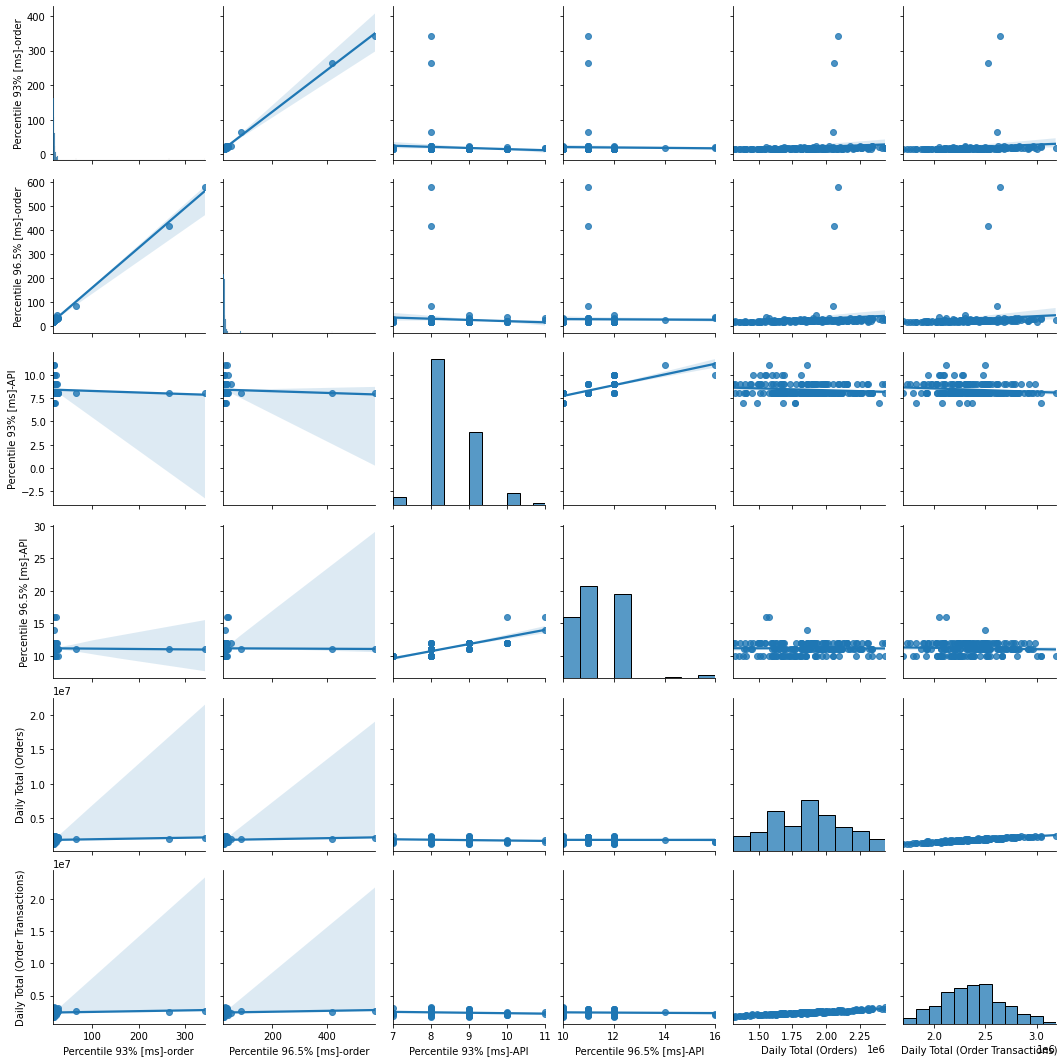

In [8]:
sns.pairplot(data_order, kind='reg');

In [24]:
data_order.describe().T

,count,mean,std,min,25%,50%,75%,max
Percentile 93% [ms]-order,181.0,2.026519e+01,30.636332,14.0,15.0,16.0,18.0,343.0
Percentile 96.5% [ms]-order,181.0,2.854144e+01,50.983818,17.0,20.0,22.0,25.0,579.0
Percentile 93% [ms]-API,181.0,8.403315e+00,0.689436,7.0,8.0,8.0,9.0,11.0
Percentile 96.5% [ms]-API,181.0,1.116575e+01,0.951687,10.0,10.0,11.0,12.0,16.0
Daily Total (Orders),181.0,1.860930e+06,266148.321781,1311079.0,1663474.0,1860438.0,2050535.0,2439376.0
Daily Total (Order Transactions),181.0,2.376283e+06,295445.401694,1702983.0,2170225.0,2369126.0,2550491.0,3184521.0


In [9]:
X = data_order[['Daily Total (Order Transactions)']]
y = data_order[['Percentile 93% [ms]-order']]

In [19]:
X = sm.add_constant(X)

In [21]:
lm = sm.OLS(y,X)

In [22]:
model = lm.fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Percentile 93% [ms]-order   R-squared:                       0.015
Model:                                   OLS   Adj. R-squared:                  0.009
Method:                        Least Squares   F-statistic:                     2.665
Date:                       Thu, 15 Jul 2021   Prob (F-statistic):              0.104
Time:                               18:53:34   Log-Likelihood:                -874.40
No. Observations:                        181   AIC:                             1753.
Df Residuals:                            179   BIC:                             1759.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -9.5795     18.422     -0.520      0.604     -45.932      26.773
Daily Total (Order Transactions)  1.256e-05   7.69e-06      1.632      0.104   -2.62e-06    2.77e-05
==============================================================================
Omnibus:                      327.589   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60515.122
Skew:                           9.293   Prob(JB):                         0.00
Kurtosis:                      90.628   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
mse = mean_squared_error(y, model.fittedvalues)

In [26]:
mse

919.7066354570479

In [28]:
rmse = np.sqrt(mse)
rmse

30.326665419347506

In [29]:
reg.predict(X)[0:10]

array([[14.75434357],
       [15.2505411 ],
       [16.99293445],
       [19.69479208],
       [18.97315297],
       [15.96379052],
       [12.32433457],
       [14.18718531],
       [13.97194199],
       [16.40060712]])

In [30]:
y[0:10]

,Percentile 93% [ms]-order
0,14
1,14
2,18
3,15
4,16
5,15
6,15
7,14
8,14
9,14


In [46]:
X = data_order[['Daily Total (Order Transactions)']]
y = data_order[['Percentile 93% [ms]-order']]
reg = LinearRegression()
model = reg.fit(X,y)


In [87]:
ass = pd.DataFrame()

In [90]:
data = pd.DataFrame(reg.predict(X)[0:20])

In [105]:
ass = pd.DataFrame(y[0:20])

In [101]:
ah = pd.DataFrame(data).reset_index()

In [103]:
ah['Preds'] = ah[0]

In [108]:
ass = ass.reset_index()

In [111]:
ah['Real'] = ass['Percentile 93% [ms]-order']

In [113]:
ah['Hata'] = ah['Real'] - ah['Preds']

In [115]:
ah['Kare'] = ah['Hata']**2

In [118]:
np.mean(ah['Kare']) 

10.718002593195084

In [119]:
ah

,index,0,Preds,Real,Hata,Kare
0,0,14.754344,14.754344,14,-0.754344,0.569034
1,1,15.250541,15.250541,14,-1.250541,1.563853
2,2,16.992934,16.992934,18,1.007066,1.014181
3,3,19.694792,19.694792,15,-4.694792,22.041073
4,4,18.973153,18.973153,16,-2.973153,8.839639
5,5,15.963791,15.963791,15,-0.963791,0.928892
6,6,12.324335,12.324335,15,2.675665,7.159185
7,7,14.187185,14.187185,14,-0.187185,0.035038
8,8,13.971942,13.971942,14,0.028058,0.000787
9,9,16.400607,16.400607,14,-2.400607,5.762915


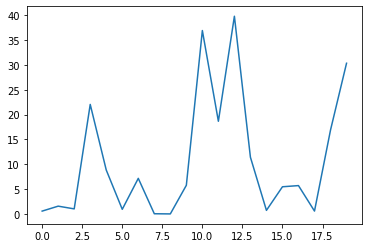

In [125]:
plt.plot(ah['Kare'])

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [128]:
knn_model = KNeighborsRegressor().fit(x_train,y_train)

,Percentile 93% [ms]-order
0,14
1,14
2,18
3,15
4,16
...,...
176,16
177,15
178,16
179,16


In [134]:
y_pred = knn_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

19.782986262304927

In [136]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  23.413213607460456
k = 3 için RMSE değeri:  32.19522678699377
k = 4 için RMSE değeri:  33.028441927988005
k = 5 için RMSE değeri:  33.361307309468934
k = 6 için RMSE değeri:  33.67489684095079
k = 7 için RMSE değeri:  34.891991705776604
k = 8 için RMSE değeri:  34.421199113521574
k = 9 için RMSE değeri:  34.37009527120339
k = 10 için RMSE değeri:  34.513897591899514


In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [139]:
knn = KNeighborsRegressor()

In [140]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [142]:
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [143]:
knn_cv_model.best_params_["n_neighbors"]

29

In [146]:
RMSE = [] 
RMSE_CV = []
for k in range(29):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, x_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  46.28242453148734
k = 2 için RMSE değeri:  23.413213607460456 RMSE_CV değeri:  50.20845169684952
k = 3 için RMSE değeri:  32.19522678699377 RMSE_CV değeri:  45.08482429561395
k = 4 için RMSE değeri:  33.028441927988005 RMSE_CV değeri:  41.84205458687804
k = 5 için RMSE değeri:  33.361307309468934 RMSE_CV değeri:  40.69199316440899
k = 6 için RMSE değeri:  33.67489684095079 RMSE_CV değeri:  40.19950049121991
k = 7 için RMSE değeri:  34.891991705776604 RMSE_CV değeri:  38.88505229511362
k = 8 için RMSE değeri:  34.421199113521574 RMSE_CV değeri:  38.306617379979585
k = 9 için RMSE değeri:  34.37009527120339 RMSE_CV değeri:  38.76696852995923
k = 10 için RMSE değeri:  34.513897591899514 RMSE_CV değeri:  38.98556710255338
k = 11 için RMSE değeri:  35.02092569855084 RMSE_CV değeri:  37.84024726945979
k = 12 için RMSE değeri:  35.79498840459879 RMSE_CV değeri:  37.65109771794306
k = 13 için RMSE değeri:  35.85986063251571 RMSE_CV değeri:  37.5807

In [154]:
forest = RandomForestRegressor(n_estimators= 100,
                            criterion= "mse",
                            random_state= 1,
                            n_jobs= -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

<ipython-input-154-d28fc6286873>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)
MSE train data: 247.096, MSE test data: 682.526
R2 train data: 0.814, R2 test data: -141.822


In [157]:
y_pred2 = forest.predict(X)

array([14.15, 14.23, 16.87, 16.2 , 14.77, 15.26, 15.17, 14.46, 14.49,
       14.09])

In [161]:
x = data_order[['Daily Total (Order Transactions)','Daily Total (Orders)']]
y = data_order[['Percentile 93% [ms]-order']]

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [163]:
forest = RandomForestRegressor(n_estimators= 100,
                            criterion= "mse",
                            random_state= 1,
                            n_jobs= -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

<ipython-input-163-d28fc6286873>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)
MSE train data: 247.096, MSE test data: 682.526
R2 train data: 0.814, R2 test data: -141.822


,Percentile 93% [ms]-order
0,14
1,14
2,18
3,15
4,16
...,...
176,16
177,15
178,16
179,16


In [164]:
forest.score(x_train,y_train)


0.8144164626622389